In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm

This notebook provides a way to visualize the VSSE vs. HFX data available in CSD-76-HFX and VSS-452-HFX.

# CSD-76-HFX

  0%|                                                    | 0/72 [00:00<?, ?it/s]


<Figure size 640x480 with 0 Axes>

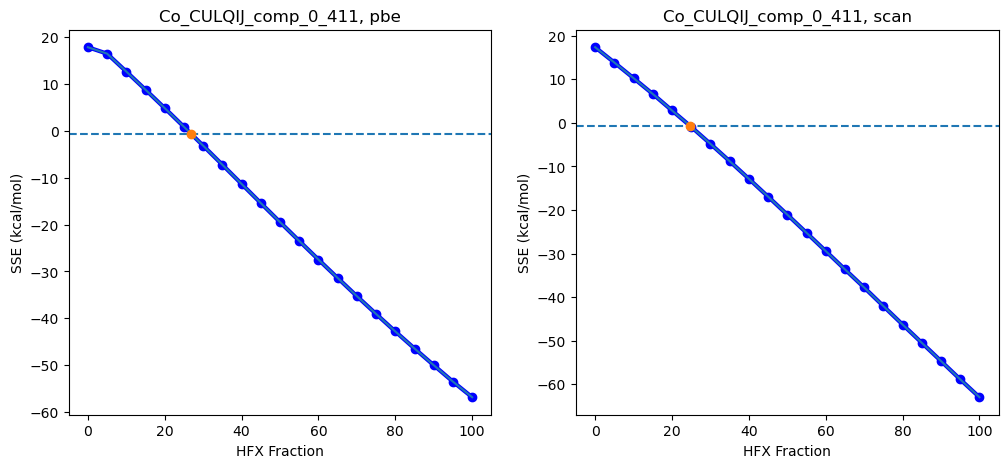

In [3]:
sse_df = pd.read_csv('../data/cleaned_csd76_sse.csv').set_index('Unnamed: 0')
hfx_df = pd.read_csv('../data/CSD76targets.csv').set_index('Unnamed: 0')
csd_76 = pd.read_csv('../data/CSD-76.csv').set_index('name')

def sse_vs_hfx(structure):
    df = csd_76
    reference = df.loc[structure]['dlpno-CCSD_T.vertsse']
    plt.figure()
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    for idx, functional in enumerate(['pbe', 'scan']):
        all_increments = np.arange(0, 101, 5)
        increments = []
        sses = []
        for i, increment in enumerate(all_increments):
            sse = sse_df.loc[structure][functional + '_hfx_' + str(increment)]
            if not np.isnan(sse):
                sses.append(sse)
                increments.append(increment)
        ax[idx].plot(increments, sses, '-o', label='True Values', linewidth=3, color='b')
        ax[idx].set_xlabel('HFX Fraction')
        ax[idx].set_ylabel('SSE (kcal/mol)')
        ax[idx].set_title(structure + ', ' + functional)
        if len(increments) < 2:
            #print('Not enough converged values!')
            continue
        
        line = interp1d(increments, sses, kind='linear', fill_value='extrapolate')

        ax[idx].plot(np.arange(0, 101, 1), line(np.arange(0, 101, 1)), label='Linear Interpolation')
        ax[idx].axhline(reference, linestyle='--', label='Reference')
        hfx = hfx_df.loc[structure]['hfx_' + functional]
        ax[idx].plot(hfx, line(hfx), 'o', label=f'Estimated Value={hfx:1.3f}')
        #plt.legend()


for struct in tqdm(sse_df.index.to_list()):
    sse_vs_hfx(struct)
    break

# VSS-452-HFX

  0%|                                                   | 0/452 [00:00<?, ?it/s]


<Figure size 640x480 with 0 Axes>

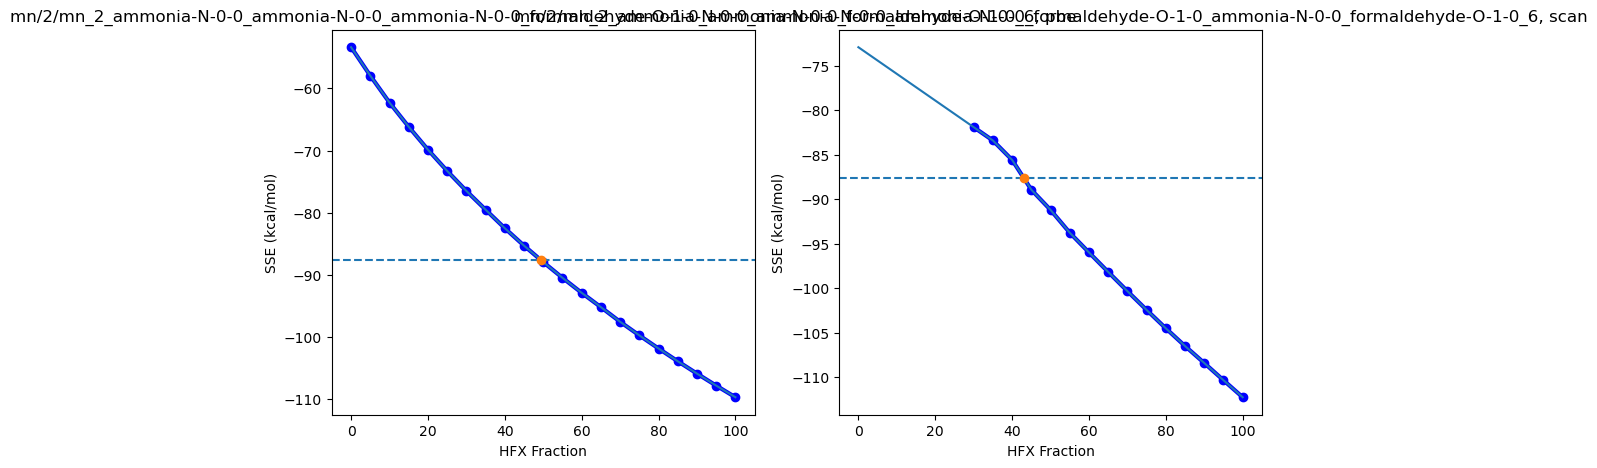

In [4]:
sse_df = pd.read_csv('../data/cleaned_vss452_sse.csv').set_index('Unnamed: 0')
hfx_df = pd.read_csv('../data/VSS452targets.csv').set_index('Unnamed: 0')
vss_452 = pd.read_csv('../data/VSS-452.csv').set_index('name')

def sse_vs_hfx(structure):
    df = vss_452
    reference = df.loc[structure.split('/')[-1]]['dlpno-CCSD_T.vertsse']
    plt.figure()
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    for idx, functional in enumerate(['pbe', 'scan']):
        all_increments = np.arange(0, 101, 5)
        increments = []
        sses = []
        for i, increment in enumerate(all_increments):
            sse = sse_df.loc[structure][functional + '_hfx_' + str(increment)]
            if not np.isnan(sse):
                sses.append(sse)
                increments.append(increment)
        ax[idx].plot(increments, sses, '-o', label='True Values', linewidth=3, color='b')
        ax[idx].set_xlabel('HFX Fraction')
        ax[idx].set_ylabel('SSE (kcal/mol)')
        ax[idx].set_title(structure + ', ' + functional)
        if len(increments) < 2:
            print('Not enough converged values!')
            continue

        line = interp1d(increments, sses, kind='linear', fill_value='extrapolate')

        ax[idx].plot(np.arange(0, 101, 1), line(np.arange(0, 101, 1)), label='Linear Interpolation')
        ax[idx].axhline(reference, linestyle='--', label='Reference')
        hfx = hfx_df.loc[structure]['hfx_' + functional]
        ax[idx].plot(hfx, line(hfx), 'o', label=f'Estimated Value={hfx:1.3f}')
        #ax[idx].legend()

for struct in tqdm(sse_df.index.to_list()):
    sse_vs_hfx(struct)
    break